本节实验目的：
- 了解人工智能领域前沿技术
- 掌握人工智能有关的开源技术和应用

要求大家在本地部署DeepSeek R1蒸馏版的模型，部署后可以尝试用该模型辅助完成课程实验。

# 1、DeepSeek R1大语言模型介绍
2024年12月26号，DeepSeek发布了DeepSeek V3大模型，采用混合精度使用H800GPU集群训练，V3 的表现优于 Llama 3.1 和 Qwen 2.5，同时与 GPT-4o 和 Claude 3.5 Sonnet 相当，且训练成本低，当时已在业界引起了很多的关注。2025年1月20号发布了其第一代推理大模型DeepSeek R1，在很多基准测试上性能与OpenAI o1推理大模型相当，因开源加上高性能在行业和社会上产生了巨大的影响。

DeepSeek将模型开源在了huggingface开源社区，除了R1和R1-zero两个大模型外，还基于阿里Qwen和Meta的Llama发布了6个蒸馏的小模型。

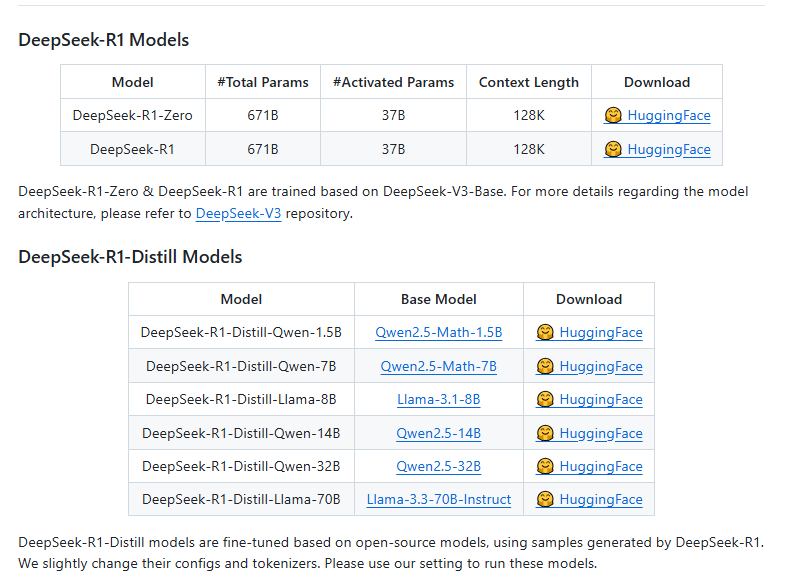

如上所示，R1和R1-zero有671B参数，B是billion，即6710亿个参数。DeepSeek-R1-Distill-Qwen-1.5B是使用R1模型生成数据微调阿里Qwen开源模型得到的蒸馏版，参数量只有1.5B。

R1使用混合精度，大部分参数是FP8精度（8位的浮点）,部分参数是BF16（16位Brain Floating Point）和FP32（32位单精度浮点）精度，因模型参数量太大，官方的原始R1模型文件有720GB大，普通服务器无法运行。蒸馏的小模型参数量小，适合本地部署运行，比如DeepSeek-R1-Distill-Qwen-1.5B适合移动端、边缘或PC，但准确性比R1也差很多。为进一步降低硬件门槛，开源社区也推出了很多量化版的，比如4位量化，用4位精度代替之前的fp8格式，模型文件基本可以减半。

# 2、使用Ollama本地部署DeepSeek 蒸馏版
Ollama是一个本地部署开源大语言模型的框架，使用简单。[Linux安装Ollama](https://ollama.com/download/linux) 只需要执行以下一条命令：
```
curl -fsSL https://ollama.com/install.sh | sh
```
Ollama支持Linux、Windows、MacOS，非Linux平台下的安装方式请查看官方手册：https://ollama.com/  。安装Ollama之后接着下载需要的模型并部署，打开[R1模型界面](https://ollama.com/library/deepseek-r1)可以看到R1相关的模型。Ollama部署的R1模型是量化版，量化方式是Q4_K_M即4位量化， 671B参数的满血版（full size ）R1量化后仍有404GB。

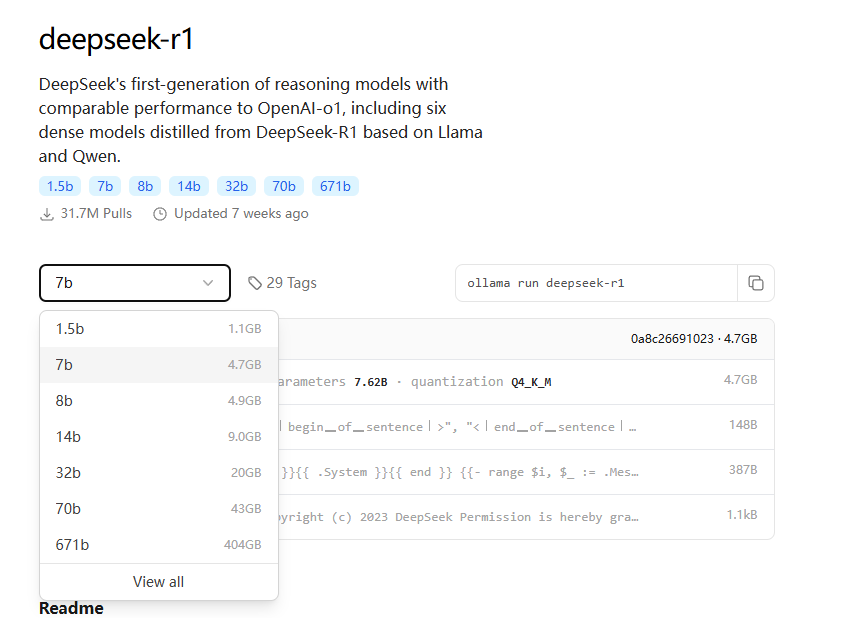

模型部署时，内存或者GPU显存通常不小于模型文件大小的1.5倍左右，建议根据个人的电脑硬件配置从以下两个最小的参数模型中选择一个部署。1.5b部署快、响应也快，但准确性稍差。7b回答效果较好，但响应较慢。
- DeepSeek-R1-Distill-Qwen-1.5B， 模型文件1.1GB大小 
- DeepSeek-R1-Distill-Qwen-7B，模型文件4.7GB大小

部署的命令也很简单，ollama run 加指定的模型即可，如下所示。执行命令后ollama会自动下载模型文件，根据网络情况，需要几分钟到几十分钟不等。若等待时间较长，可以先做后面的部分。
```
ollama run deepseek-r1:1.5b
ollama run deepseek-r1:7b
```

下载完之后会自动启动进入交互模式，即可进行提问。

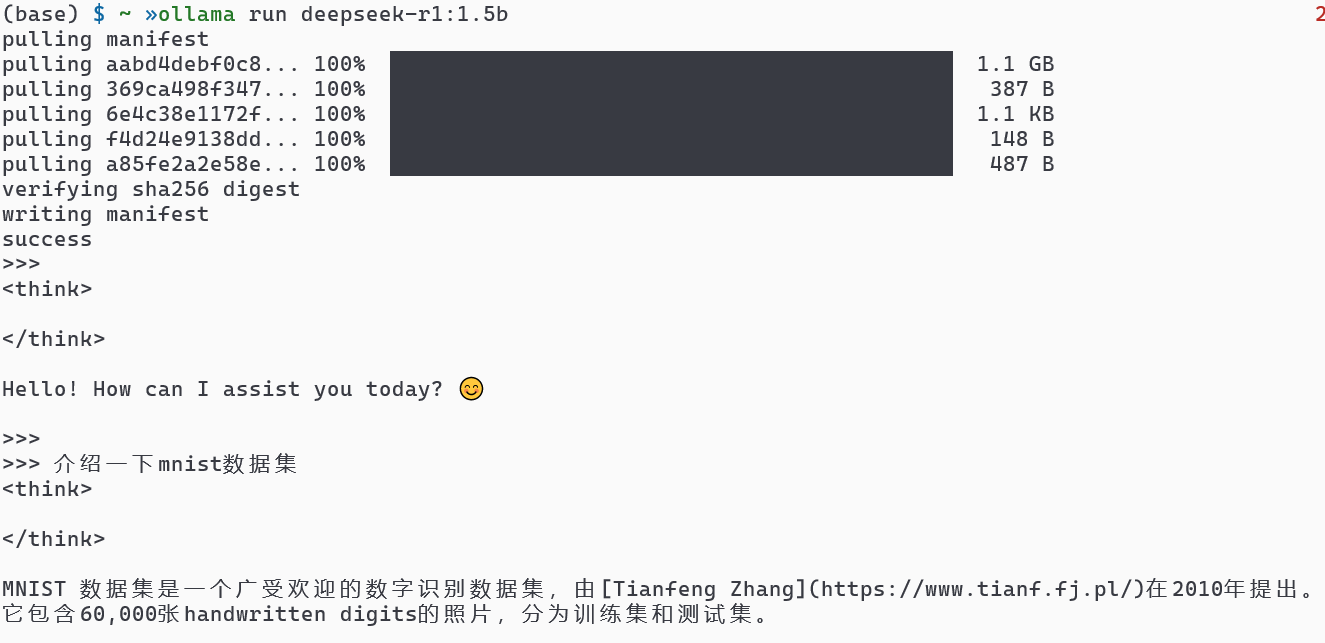

# 3、使用Open WebUI支持浏览器访问
Ollama部署后支持从命令行交互，同时启动了API服务： http://localhost:11434，若要从浏览器访问，需要部署Open WebUI等工具。Open WebUI 是一个可扩展、功能丰富、用户友好的自托管人工智能平台。它支持各种 LLM 运行程序，如 Ollama 和 OpenAI 兼容 API。

安装方式很简单，Python需要是3.11及以上的版本，请先使用conda创建一个对应的虚拟环境，再直接`pip install open-webui`即可。

安装之后使用`open-webui serve`启动服务，启动后访问 http://localhost:8080 打开界面。

# 4、选做内容
选做（不加分）：
- 1、探索使用vLLM、SGLang等推理框架进行部署。
- 2、探索增加联网搜索功能。

选做（加分）：
- 1、使用 [高性能计算云服务中心slurm集群](http://hpc.hitsz.edu.cn/) 探索部署满血量化版R1，部署框架不限，量化版不限，可以选择更低精度的量化，支持浏览器访问。并从 [R1技术报告](https://github.com/deepseek-ai/DeepSeek-R1/blob/main/DeepSeek_R1.pdf) 中的评估测试集选择一个运行测试与官方数据做对比，比如CLUEWSC。可两人组队，进行任务前联系任课教师申请资源。最多可加10分，要求单独撰写文档：部署方案、步骤、数据集的测试结果、碰到的问题。

参考资料：
- https://github.com/deepseek-ai/DeepSeek-V3
- https://github.com/deepseek-ai/DeepSeek-R1
- https://en.wikipedia.org/wiki/DeepSeek
- https://github.com/open-webui/open-webui
- https://ollama.com/